# Important note!

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
YOUR_ID = "aroy74" # Please enter your GT login, e.g., "rvuduc3" or "gtg911x"
COLLABORATORS = [] # list of strings of your collaborators' IDs

In [2]:
import re

RE_CHECK_ID = re.compile (r'''[a-zA-Z]+\d+|[gG][tT][gG]\d+[a-zA-Z]''')
assert RE_CHECK_ID.match (YOUR_ID) is not None

collab_check = [RE_CHECK_ID.match (i) is not None for i in COLLABORATORS]
assert all (collab_check)

del collab_check
del RE_CHECK_ID
del re

**Jupyter / IPython version check.** The following code cell verifies that you are using the correct version of Jupyter/IPython.

In [3]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

# Floating-point arithmetic

Since it's a short week---not to mention one that precedes Thanksgiving---let's do a "small" lesson about a topic we should all be thankful for, namely, floating-point arithmetic!

## IEEE-754 format

Real values are typically stored in _IEEE-754 floating-point format_. If you have programmed in other languages, you may have seen scalar data types for _single-precision_ and _double-precision_ formats (e.g., `float` and `double` in C/C++/Java). A "floating-point" encoding is basically a normalized scientific notation consisting of a _base_, a _sign_, a fractional _significand_ or _mantissa_, and an integer _exponent_. Let's look at an example to see how this might work.

Consider the value 0.125. In a normalized scientific notation, we would write this number as $+1.25 \times 10^{-1}$, where the base is 10, the significant is 1.25, and the exponent is -1. Conceptually, if we always used base 10 for all our floating-point values, then our floating-point encoding of this value would, conceptually, be a tuple $(+, 1.25, -1)$. 

However, we cannot store an infinite number of digits for the significand and exponent values. Thus, we would normally _also_ limit the number of digits that may appear in either. We might use, say, 6 digits for the significand and 2 digits (ignoring the sign) for the exponent, i.e., a tuple of the form $(\pm, s.sssss, \pm xx)$.

**Exercise 1** (4 points). What is the largest value we could represent in this format? What is the smallest value? What is the smallest _positive_ value we could represent? How would we encode these values?

Largest value -> (+, 9.99999, +99)

Smallest value -> (-,9.99999, +99)

Smallest positive value -> (+, 1.00000, -99)

**Exercise 2** (4 points). Encode the following values as tuples:

1. $1.0$
2. $-10^{-6}$
3. $1.0 - 10^{-6}$
4. $1.0 + 10^{-6}$

For example, for the value of 0.125, you would write, `(+, 1.25000, -01)`.

1. (+, 1.00000, +00)

2. (-,1.00000, -06)

3. (+, 9.99999, -01)

4. (+,1.00000, +00)

## A small surprise? The consequences of finite-precision

Let $a=1.0$ and $b=10^{-6}$. Now consider two program fragments.

_Program 1_:

    s = a - b
    t = s + b
    
_Program 2_:

    s = a + b
    t = s - b
    
If the _precision_, or number of digits in the encoding, were infinite, then both programs would produce `t == a == 1.0`.

**Exercise 3** (2 points). Suppose we instead use a _finite-precision_ floating-point encoding, using base 10 digits with 6 digits of precision for the significand and 2 digits for the exponent, plus separate sign "digits" for each. What is the final value of `t` in each of these two programs?

Program 1-> 1.0

Program 2-> 0.999999

## Binary (base 2) encodings

The preceding examples assume the digits are represented in base 10. However, computers encode all values using _bits_, which are _base 2_ digits. All the same ideas as above apply, but on base 2 values rather than base 10 values.

One consequence of this difference is that certain finite-precision decimal fractions _cannot_ be represented exactly!

> Can you see why? Consider the decimal value 0.1 represented in a binary format.

In addition, the IEEE floating-point standard defines the encoding a little differently than we've used it. First, if the value is not 0, then the significand _always_ has an implicit "1" as the leading digit; therefore, it needn't be stored explicitly, thereby saving a bit and effectively increasing the precision a little. Secondly, the range of the exponent is not symmetric. In our hypothetical base-10 "6 + 2" encoding, we assumed the exponent would range from -99 to 99, which is a symmetric interval; in IEEE floating-point, there will be a slight asymmetry in this range. Part of the reason is that the IEEE floating-point encoding can also represent several kinds of special values, such as infinities and an odd bird called "not-a-number" or `NaN`. This latter value, which you may have seen if you have used any standard statistical packages, can be used to encode certain kinds of floating-point exceptions that result when, for instance, you try to divide by zero.

In IEEE floating-point, there are two main encodings, known as _single-precision_ (`float` in C/C++/Java) and _double-precision_ (`double` in C/C++/Java). In brief, these differ as follows:

* Single-precision: 32 bits total, with 24 bits for the significand and an exponent range of [-126, 127].
* Double-precision: 64 bits total, with 53 bits for the significand and an exponent range of [-1022, 1023].

The length of the significand _includes_ the leading digit (e.g., a 4-bit significand would be `1.xxx`).

**Exercise 4** (2 points). What is the smallest positive value that can be represented in IEEE single-precision? What about in double-precision?

Smallest single precision -> (+, 1.00000, -126)

Smallest double precision -> (+, 1.00000, -1022)

**Exercise 5** (2 points). Consider the smallest possible value greater than 1.0 that can be represented in floating-point. Let's call this value, $1.0 + \epsilon$.

Determine $\epsilon_s$ and $\epsilon_d$, the corresponding values of $\epsilon$ in single-precision and double-precision, respectively.

> The value $\epsilon$ is also referred to as _machine epsilon_.

$\epsilon_s$ -> $2^{-23}$

$\epsilon_d$ -> $2^{-52}$

Another important consequence of the binary format is that when you print values in base ten, what you see may not be what you get! For instance, try running the code below.

> This code invokes Python's [`decimal`](https://docs.python.org/3/library/decimal.html) package, which implements base-10 floating-point arithmetic in software.

In [1]:
from decimal import Decimal

x = 1.0 + 2.0**(-52)

print (x)
print (Decimal (x)) # What does this do?

1.0000000000000002
1.0000000000000002220446049250313080847263336181640625


> Aside: If you ever need true decimal storage with no loss of precision (e.g., accounting applications), turn to the `decimal` package. Just be warned it will come at a price:

In [2]:
a_native = 1.0
b_native = 2.0

a_decimal = Decimal ('1.0')
b_decimal = Decimal ('2.0')

%timeit a_native + b_native
%timeit a_decimal + b_decimal

The slowest run took 19.09 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 94.9 ns per loop
The slowest run took 66.67 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 208 ns per loop


For today's lesson, it will be helpful to occasionally peek at floating-point values "in the raw." For this purpose, we've provided you with a handy routine called `float_to_bin(x)`, which given a floating-point value `x` will return its IEEE representation as a binary string. (It is defined in the `cse6040utils` module.)

The following code uses `float_to_bin()` to define another function that dumps a floating-point number's complete `Decimal` form along with its binary form.

In [3]:
from cse6040utils import float_to_bin, print_float_bin

a = -1.0
b = 2.**(-52)  # Recall: \epsilon_d
c = b / 2.

print_float_bin (a, prefix="a")
print_float_bin (b, prefix="b")
print_float_bin (c, prefix="c")

a: -1
   [-0.0000000000000000000000000000000000000000000000000000]_{2}e+0
b: 2.220446049250313080847263336181640625E-16
   [1.0000000000000000000000000000000000000000000000000000]_{2}e-52
c: 1.1102230246251565404236316680908203125E-16
   [1.0000000000000000000000000000000000000000000000000000]_{2}e-53


Recall the two program fragments from above:

_Program 1_:

    s = a - b
    t = s + b
    
_Program 2_:

    s = a + b
    t = s - b

Let $a=1.0$ and $b=\epsilon_d / 2 \approx 1.11 \times 10^{-16}$. Recall that we do not expect these programs to return the same value; let's run some Python code to see.

> Note: The IEEE standard guarantees that given two finite-precision floating-point values, the result of applying any binary operator to them is the same as if the operator were applied in infinite-precision and then rounded back to finite-precision. The precise nature of rounding can be controlled by so-called _rounding modes_; the default rounding mode is "[round-half-to-even](http://en.wikipedia.org/wiki/Rounding)."

In [4]:
a = 1.0
b = 2.**(-53) # == $\epsilon_d$ / 2.0

s1 =  a - b
t1 = s1 + b

s2 =  a + b
t2 = s2 - b

print_float_bin (s1, prefix="s1")
print_float_bin (t1, prefix="t1")
print ("\n")
print_float_bin (s2, prefix="s2")
print_float_bin (t2, prefix="t2")

print ("\n", t1, t2)
print ("\n(t1 == t2) == %s" % (t1 == t2))

s1: 0.99999999999999988897769753748434595763683319091796875
    [1.1111111111111111111111111111111111111111111111111111]_{2}e-1
t1: 1
    [0.0000000000000000000000000000000000000000000000000000]_{2}e+0


s2: 1
    [0.0000000000000000000000000000000000000000000000000000]_{2}e+0
t2: 0.99999999999999988897769753748434595763683319091796875
    [1.1111111111111111111111111111111111111111111111111111]_{2}e-1

 1.0 0.9999999999999999

(t1 == t2) == False


By the way, in Numpy you can determine machine epsilon in a portable way:

In [5]:
import numpy as np

EPS_S = np.finfo (np.float32).eps
EPS_D = np.finfo (float).eps

print_float_bin (float (EPS_S), prefix="eps_s")
print_float_bin (float (EPS_D), prefix="eps_d")

eps_s: 1.1920928955078125E-7
       [1.0000000000000000000000000000000000000000000000000000]_{2}e-23
eps_d: 2.220446049250313080847263336181640625E-16
       [1.0000000000000000000000000000000000000000000000000000]_{2}e-52


## Analyzing floating-point programs

Let's say someone devises an algorithm to compute $f(x)$. For a given value $x$, let's suppose this algorithm produces the value $\mathrm{alg}(x)$. One important question might be, is that output "good" or "bad?"

**Forward stability.** One way to show that the algorithm is good is to show that

$$
  \left| \mathrm{alg}(x) - f(x) \right|
$$

is "small" for all $x$ of interest to your application. What is small depends on context. In any case, if you can show it then you can claim that the algorithm is _forward stable_.

**Backward stability.** Sometimes it is not easy to show forward stability directly. In such cases, you can also try a different technique, which is to show that the algorithm is, instead, _backward stable_.

In particular, $\mathrm{alg}(x)$ is a _backward stable algorithm_ to compute $f(x)$ if, for all $x$, there exists a "small" $\Delta x$ such that

$$\mathrm{alg}(x) = f(x + \Delta x).$$

In other words, if you can show that the algorithm produces the exact answer to a slightly different input problem (meaning $\Delta x$ is small, again in a context-dependent sense), then you can claim that the algorithm is backward stable.

**Round-off errors.** You already know that numerical values can only be represented finitely, which introduces round-off error. Thus, at the very least we should hope that a scheme to compute $f(x)$ is as insensitive to round-off errors as possible. In other words, given that there will be round-off errors, if you can prove that $\mathrm{alg}(x)$ is either forward or backward stable, then that will give you some measure of confidence that your algorithm is good.

Here is the "standard model" of round-off error. Start by assuming that every scalar floating-point operation incurs some bounded error. That is, let $a \odot b$ be the exact mathematical result of some operation on the inputs, $a$ and $b$, and let $\mathrm{fl}(a \odot b)$ be the _computed_ value, after rounding in finite-precision. The standard model says that

$$\mathrm{fl}(a \odot b) \equiv (a \odot b) (1 + \delta),$$

where $|\delta| \leq \epsilon$, machine epsilon.

Let's apply these concepts on an example.

## Example: Computing a sum

Let $p$ be a vector (array) of length $n$. Suppose we wish to sum its values. Mathematically, denote the exact sum by,

  $$s_{n-1} = \sum_{i=0}^{n-1} p_i = p_0 + p_1 + p_2 + \cdots + p_{n-1}.$$
  
Now consider the following Python program to compute its sum:

In [6]:
def alg_sum (p): # p = p[0:n]
    s = 0.
    for p_i in p:
        s += p_i
    return s

**Analysis in exact arithmetic.** This algorithm is correct _in exact arithmetic_, i.e., in the absence of round-off error. If you wanted to argue that more formally, you might do so as follows using the technique of [proof by induction](https://en.wikipedia.org/wiki/Mathematical_induction).

First, assume that the `for` loop enumerates each element `p[i]` in order from `i=0` to `n-1`, where `n=len (p)`. That is, assume `p_i` is `p[i]`.

Let $p_k \equiv \mathtt{p[}k\mathtt{]}$ be the $k$-th element of `p[:]`. Let $s_i \equiv \sum_{k=0}^{i} p_k$; in other words, $s_i$ is the _exact_ mathematical sum of `p[:i+1]`. Thus, $s_{n-1}$ is the exact sum of `p[:]`.

Let $\hat{s}_{-1}$ denote the initial value of the variable `s`, which is 0. For any $i \geq 0$, let $\hat{s}_i$ denote the _computed_ value of the variable `s` immediately after the execution of line 4, where $i=\mathtt{i}$. When $i=\mathtt{i}=0$, $\hat{s}_0 = \hat{s}_{-1} + p_0 = p_0$, which is the exact sum of `p[:1]`. Thus, $\hat{s}_0 = s_0$.

Now suppose that $\hat{s}_{i-1} = s_{i-1}$. When $\mathtt{i}=i$, we want to show that $\hat{s}_i = s_i$. After line 4 executes, $\hat{s}_{i} = \hat{s}_{i-1} + p_i = s_{i-1} + p_i = s_i$. Thus, the computed value $\hat{s}_i$ is the exact sum $s_i$.

If $i=n$, then, at line 5, the value $\mathtt{s}=\hat{s}_{n-1}=s_{n-1}$, and thus the program must in line 5 return the exact sum.

**Analysis under round-off.** Unfortunately, we know that the arithmetic operations are, in floating-point, _not_ exact because each execution of line 4 introduces some round-off error. Let's instead try to estimate the total round-off error,

$$\mbox{alg_sum}(\mathtt{p[:]}) - s_{n-1}.$$

The `alg_sum` program performs $n$ additions. Denote the numerical result of each addition by $\hat{s}_i$, where $i \in [0, n)$. Since the accumulator variable `s` is initially 0, let's further suppose that the "zero-th" addition, which is `0 + p[0]` is performed exactly. In other words, $\hat{s}_0 = p_0 (1 + \delta_0) = p_0$, if we take the round-off error $\delta_0 = 0$.

Now consider the $i$-th addition in exact arithmetic, $s_i$, for each $i > 0$. When $\mbox{alg_sum}$ carries out this addition, it incurs a round-off error, $\delta_i$. Let's analyze how these errors accumulate.

Start by considering the first intermediate result, $\hat{s}_1$:

$$
\begin{array}{rcl}
  \hat{s}_1 & = & (\hat{s}_0 + p_1) (1 + \delta_1) \\
            & = & \hat{s}_0 + p_1 + (\hat{s}_0 + p_1)\delta_1 \\
            & = & \underbrace{p_0 + p_1}_{= s_1} + (p_0 + p_1)(1 + \delta_1) \\
      & = & s_1 + s_1\delta_1.
\end{array}
$$

That is, $\hat{s}_1$ is the exact sum, $s_1$, _plus_ an error proportional to $s_1$.

Consider the next computed result, $\hat{s}_2$:

$$
\begin{array}{rcl}
  \hat{s}_2 & = & (\hat{s}_1 + p_2) (1 + \delta_2) \\
            & = & \hat{s}_1 + p_2 + (\hat{s}_1 + p_2)\delta_2 \\
            & = & s_1 + s_1\delta_1 + p_2 + (s_1 + s_1\delta_1 + p_2)\delta_2 \\
            & = & s_2 + s_1\delta_1 + s_2\delta_2 + s_1\delta_1\delta_2.
\end{array}
$$

Observe that this result has a term containing the product of _two_ round-off errors, $\delta_1 \delta_2$.

Let's try one more step:

$$
\begin{eqnarray}
  \hat{s}_3
    & = & (\hat{s}_2 + p_3)(1 + \delta_3) \\
    & = & \left( \underbrace{s_2 + p_3}_{\equiv \, s_3} + s_1 \delta_1 + s_2 \delta_2 + s_1 \delta_1 \delta_2 \right) (1 + \delta_3) \\
    & = & s_3 + s_1 \delta_1 + s_2 \delta_2 + s_3 \delta_3 + \left. \mathcal{O}( \delta_i \delta_j ) \right|_{i,j \leq 3},
\end{eqnarray}
$$

where the $\mathcal{O}(\delta_i \delta_j)$ term indicates all terms involving pairs of round-off error products.

At this point, the pattern should be evident.

$$
\begin{eqnarray}
  \hat{s}_{n-1}
    & = &
      s_{n-1} + \left( \sum_{k=0}^{n-1} s_k \delta_k \right)
              + \left. \mathcal{O}(\delta_i \delta_j) \right|_{i,j < n} \\
    & = &
      s_{n-1} + \left( \sum_{k=0}^{n-1} \delta_k \sum_{l=0}^{k} p_l \right)
              + \left. \mathcal{O}(\delta_i \delta_j) \right|_{i,j < n}.
\end{eqnarray}
$$

**The algorithm is backward stable.** So we know the algorithm may not produce the exact answer. But how bad is it? Let's try to show that it is, in fact, _backward stable_, meaning it computes the exact answer to slightly different problem.

Let's start with the following simplifying assumption. If each round-off error is small, then we can _ignore_ all terms involving products of these small values, i.e.,

$$
\begin{eqnarray}
  \hat{s}_{n-1}
    & \approx &
      s_{n-1} + \left( \sum_{k=0}^{n-1} \delta_k \sum_{l=0}^{k} p_l \right).
\end{eqnarray}
$$

Next, convince yourself that the double-sums may be rearranged into the following form:

$$
  \left( \sum_{k=0}^{n-1} \delta_k \sum_{l=0}^{k} p_l \right)
  = \left( \sum_{l=0}^{n-1} p_l \sum_{k=l}^{n-1} \delta_k \right).
$$

Thus,

$$
\begin{eqnarray}
  \hat{s}_{n-1}
    & \approx &
      s_{n-1} + \left( \sum_{l=0}^{n-1} p_l \sum_{k=l}^{n-1} \delta_k \right).
\end{eqnarray}
$$

Lastly, expand $s_{n-1}$:

$$
\begin{eqnarray}
  \hat{s}_{n-1}
    & \approx &
      \left( \sum_{l=0}^{n-1} p_l \right)
      + \left( \sum_{l=0}^{n-1} p_l \sum_{k=l}^{n-1} \delta_k \right) \\
    & = &
      \sum_{l=0}^{n-1} p_l \left( 1 + \sum_{k=l}^{n-1} \delta_k \right).
\end{eqnarray}
$$

Let

$$
  \Delta_l \equiv \sum_{k=l}^{n-1} \delta_k.
$$

Then,

$$
  \hat{s}_{n-1} \approx \sum_{l=0}^{n-1} p_l (1 + \Delta_l).
$$

The right-hand side is the _exact_ sum to a problem where each $p_l$ is perturbed by $\Delta_l$.

The question is whether this perturbation is large or small. Consider that every $\delta_k$ satisfies $|\delta_k| \leq \epsilon$. Then,

$$
  \Delta_l < |\Delta_l|
           = \left| \sum_{k=l}^{n-1} \delta_k \right|
           \leq \sum_{k=l}^{n-1} \left| \delta_k \right|
           \leq \sum_{k=l}^{n-1} \epsilon
           = (n-l) \epsilon
           \leq n \epsilon.
$$

So when will $n \epsilon$ be small? Recall that in double-precision, $|\delta_i| \leq \epsilon_d = 2^{-52} \approx 10^{-16}$. So, if you are summing $n$ values, then you can use this algorithm to sum on the order of $n \sim \mathcal{O}(10^{12} = 1\mbox{ trillion})$ double-precision values while keeping $n\epsilon_d \lesssim 1/1000.$ Thus, the algorithm is backward stable if you aren't summing more than that many values.

In the case of this summation, we can quantify not just the _backward error_ (i.e., $\Delta_l$) but also the _forward error_.

$$
\begin{eqnarray}
  \left| \hat{s}_{n-1} - s_{n-1} \right|
    & \approx &
      \left| \sum_{l=0}^{n-1} p_l \Delta_l \right| \\
    & \leq &
      \sum_{l=0}^{n-1} |p_l| \cdot \left| \Delta_l \right| \\
    & \leq &
      \sum_{l=0}^{n-1} |p_l| \cdot (n-l) \epsilon \\
    & \leq &
      n \epsilon \sum_{l=0}^{n-1} |p_l| \\
    & = &
      n \epsilon \| p \|_1.
\end{eqnarray}
$$

**A numerical experiment.** Let's do an experiment to verify that these bounds hold.

In [7]:
n = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
x = [0.1] * max (n)
s = [1., 10., 100., 1000., 10000., 100000., 1000000.] # exact result
t = [alg_sum (x[0:n_i]) for n_i in n]

In [8]:
import pandas as pd
from IPython.display import display

t_minus_s_rel = [(t_i - s_i) / s_i for s_i, t_i in zip (s, t)]
display (pd.DataFrame ({'n': n, 'rel_err': t_minus_s_rel}))

,n,rel_err
0,10,-1.110223e-16
1,100,-1.953993e-15
2,1000,-1.406875e-14
3,10000,1.588205e-13
4,100000,1.884837e-12
5,1000000,1.332883e-11
6,10000000,-1.610246e-10


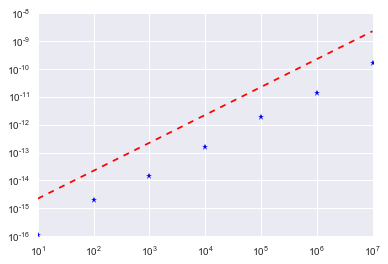

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

rel_err_computed = [abs (ti-si) / abs (si) for (si, ti) in zip (s, t)]
rel_err_bound = [float (ni) * (2.**(-52)) for ni in n]

# Plot of the relative error bound
plt.loglog (n, rel_err_computed, 'b*', n, rel_err_bound, 'r--')

## Exercise: Computing dot products

Let $x$ and $y$ be two vectors of length $n$, and denote their dot product by $f(x, y) \equiv x^T y$.

Now suppose we store the values of $x$ and $y$ _exactly_ in two Python arrays, `x[0:n]` and `y[0:n]`. Further suppose we compute their dot product by the program, `alg_dot()`.

In [10]:
def alg_dot (x, y):
    p = [xi*yi for (xi, yi) in zip (x, y)]
    s = alg_sum (p)
    return s

**Exercise 6** (4 points). Show under what conditions `alg_dot()` is backward stable.

> _Hint._ Let $(x_k, y_k)$ denote the exact values of the corresponding inputs, $(\mathtt{x}[k], \mathtt{y}[k])$. Then the true dot product, $x^T y = \sum_{l=0}^{n-1} x_l y_l$. Next, let $\hat{p}_k$ denote the $k$-th computed product, i.e., $\hat{p}_k \equiv x_k y_k (1 + \gamma_k)$, where $\gamma_k$ is the $k$-th round-off error and $|\gamma_k| \leq \epsilon$. Then apply the results for `alg_sum()` to analyze `alg_dot()`.

YOUR ANSWER HERE

## Exercise: More accurate summation

Suppose you wish to compute the sum, $s = x_0 + x_1 + x_2 + x_3$. Let's say you use the "standard algorithm," which accumulates the terms one-by-one from left-to-right, as done by `alg_sum()` above.

For the standard algorithm, let the $i$-th addition incur a roundoff error, $\delta_i$. Then our usual error analysis would reveal that the absolute error in the computed sum, $\hat{s}$, is approximately:

$$
\begin{array}{rcl}
  \hat{s} - s
    & \approx &
      x_0(\delta_0 + \delta_1 + \delta_2 + \delta_3)
      + x_1(\delta_1 + \delta_2 + \delta_3)
      + x_2(\delta_2 + \delta_3)
      + x_3\delta_3.
\end{array}
$$

And since $|\delta_i| \leq \epsilon$, you would bound the absolute value of the error by,

$$
\begin{array}{rcl}
  \left| \hat{s} - s \right|
    & \lesssim &
      (4|x_0| + 3|x_1| + 2|x_2| + 1|x_3|)\epsilon.
\end{array}
$$

Notice that $|x_0|$ is multiplied by 4, $|x_1|$ by 3, and so on.

In general, if there are $n$ values to sum, the $|x_i|$ term will be multiplied by $n-i$.

**Exercise 7** (3 points). Based on the preceding observation, explain how to preprocess the input array $x$ in order to improve the accuracy of computing its sum.

Given that the first element of the array bears the highest error 'load', and these 'loads' (coefficients) get smaller with the next element, we could preprocess the input array by sorting it. Hence, the smallest element would be multiplied by the biggest error (and so on), and we would have a more accurate sum eventually. 